In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
import xgboost as xgb
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import time

In [2]:
df = pd.read_excel('GTEx_pancreas_liver_images_liverfat_pancreasfat.xlsx', index_col=0)
cols = [
    'Sex',
    'Age.Bracket',
    'Hardy.Scale',
    'Pathology.Categories_pancreas',
    'Pathology.Categories_liver',
    'Fat.Percentage_liver',
    'Fat.Percentage_pancreas'
       ]
# df1 = df[df.columns[~df.columns.isin(cols)]]

In [3]:
cols_liver = [
    'Sex',
    'Age.Bracket',
    'Hardy.Scale',
    'Pathology.Categories_liver',
#     'Pathology.Notes_liver',
    'Fat.Percentage_liver',
       ]
df_liver = df[cols_liver]
df_liver.head()

,Sex,Age.Bracket,Hardy.Scale,Pathology.Categories_liver,Fat.Percentage_liver
Subject.ID,,,,,
GTEX-1117F,female,60-69,Slow death,necrosis,28.672134
GTEX-111FC,male,60-69,Fast death - violent,congestion,33.668883
GTEX-111VG,male,60-69,Intermediate death,"fibrosis, inflammation",32.850612
GTEX-113JC,female,50-59,Fast death - natural causes,steatosis,31.373621
GTEX-117XS,male,60-69,Fast death - natural causes,"fibrosis, inflammation, steatosis",29.382420


In [5]:
# df0 = df_liver['Fat.Percentage_liver']
# df0 = pd.cut(df_liver['Fat.Percentage_liver'],bins=4, labels=False)
df0 = pd.qcut(df_liver['Fat.Percentage_liver'],4, labels=False)
df1 = pd.get_dummies(df_liver[['Sex','Age.Bracket']])
df2 = df_liver['Hardy.Scale'].str.get_dummies(sep='-').add_prefix('Hardy.Scale_')
df3 = df_liver['Pathology.Categories_liver'].str.get_dummies(sep=',').add_prefix('Pathology.Categories_liver_')
# df4 = df_liver['Pathology.Notes_liver'].str.get_dummies(sep=',').add_prefix('Pathology.Notes_liver_')
result = pd.concat([df1,df2,df3,df0], axis=1, sort=False)
result.head()

,Sex_female,Sex_male,Age.Bracket_20-29,Age.Bracket_30-39,Age.Bracket_40-49,Age.Bracket_50-59,Age.Bracket_60-69,Age.Bracket_70-79,Hardy.Scale_ natural causes,Hardy.Scale_ violent,...,Pathology.Categories_liver_fibrosis,Pathology.Categories_liver_hemorrhage,Pathology.Categories_liver_hepatitis,Pathology.Categories_liver_inflammation,Pathology.Categories_liver_necrosis,Pathology.Categories_liver_no_abnormalities,Pathology.Categories_liver_nodularity,Pathology.Categories_liver_sclerotic,Pathology.Categories_liver_steatosis,Fat.Percentage_liver
Subject.ID,,,,,,,,,,,,,,,,,,,,,
GTEX-1117F,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
GTEX-111FC,0,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,2
GTEX-111VG,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,2
GTEX-113JC,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,2
GTEX-117XS,0,1,0,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,2


In [ ]:
# df_liver['Fat.Percentage_liver'].sort_values().plot()
# df_liver['Fat.Percentage_liver'].hist(bins=100)

In [7]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(result.drop('Fat.Percentage_liver', axis=1).values)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 577 samples in 0.016s...
[t-SNE] Computed neighbors for 577 samples in 0.031s...
[t-SNE] Computed conditional probabilities for sample 577 / 577
[t-SNE] Mean sigma: 0.843984
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.292156
[t-SNE] KL divergence after 300 iterations: 0.619279
t-SNE done! Time elapsed: 0.6874825954437256 seconds


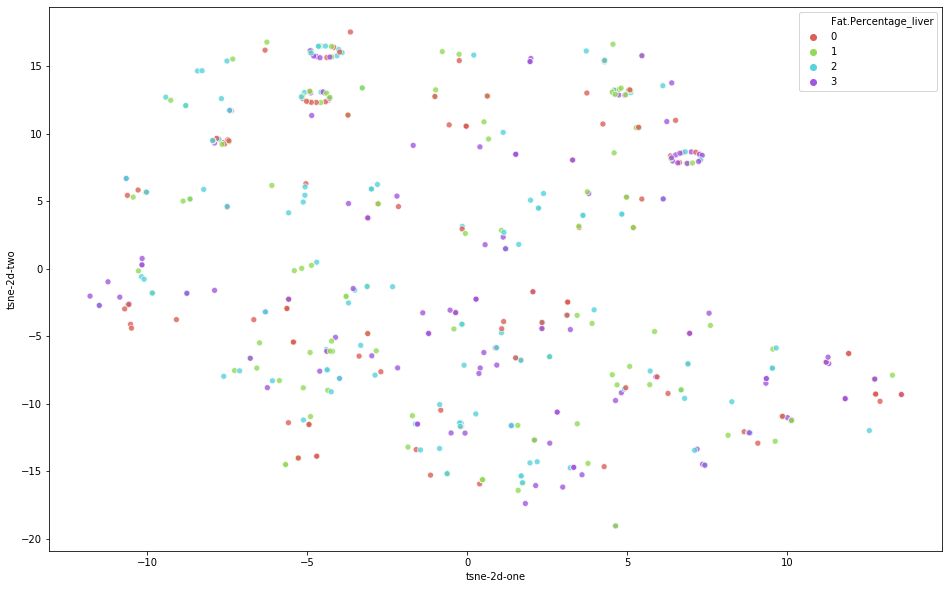

In [8]:
result['tsne-2d-one'] = tsne_results[:,0]
result['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one",
    y="tsne-2d-two",
    hue="Fat.Percentage_liver",
    palette=sns.color_palette("hls", 4),
    data=result,
    legend="full",
    alpha=0.8
)

In [9]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(result.drop('Fat.Percentage_liver', axis=1).values)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.73915965 0.24387705]


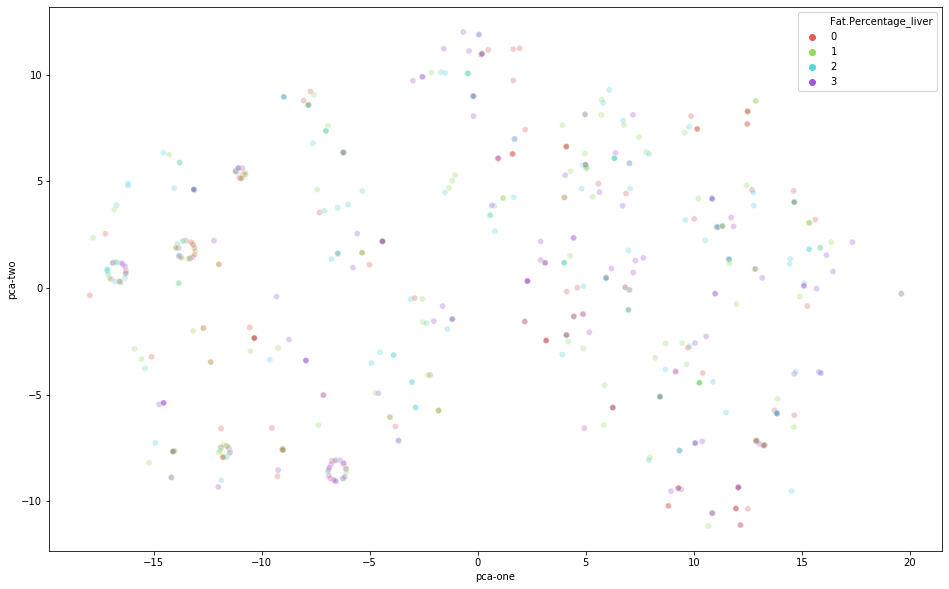

In [10]:
result['pca-one'] = pca_result[:,0]
result['pca-two'] = pca_result[:,1] 
# result['pca-three'] = pca_result[:,2]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one",
    y="pca-two",
    hue="Fat.Percentage_liver",
    palette=sns.color_palette("hls", 4),
    data=result,
    legend="full",
    alpha=0.3
)

In [ ]:
# Create correlation matrix
corr_matrix = result.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
result1 = result.drop(result[to_drop], axis=1)
result1

In [ ]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(16, 9))
corr = result.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
# # f.subplots_adjust(top=0.93)
# t= f.suptitle('Wine Attributes Correlation Heatmap', fontsize=14)

In [ ]:
# df['Pathology.Categories_pancreas'].unique()

In [ ]:
# df_test = pd.read_excel('GTEx_pancreas_liver_images_liverfat_pancreasfat_seq.xlsx', index_col=0)
# test_cols = [
#     'Sex',
#     'Age.Bracket',
#     'Hardy.Scale',
#     'Pathology.Categories_pancreas',
#     'Pathology.Categories_liver',
#     'Fat,Percentage_liver',
#     'Fat,Percentage_pancreas'
#        ]
# df_test = df_test[test_cols]

In [ ]:
# categorical_features = [
#     'Sex',
#     'Age.Bracket',
#     'Hardy.Scale',
# ]

# fig, ax = plt.subplots(1, len(categorical_features), figsize=(16,9))
# for i, categorical_feature in enumerate(df[categorical_features]):
#     df[categorical_feature].value_counts().plot(kind = "bar", ax=ax[i]).set_title(categorical_feature)
#     plt.tight_layout()
# fig.show()

In [ ]:
# categorical_features = [
#     'Pathology.Categories_pancreas',
#     'Pathology.Categories_liver'
# ]

# fig, ax = plt.subplots(1, len(categorical_features), figsize=(16,9))
# for i, categorical_feature in enumerate(df[categorical_features]):
#     df[categorical_feature].value_counts().plot(kind = "bar", ax=ax[i]).set_title(categorical_feature)
#     plt.tight_layout()
# fig.show()

In [ ]:
# df[['Fat.Percentage_liver']].sort_values('Fat.Percentage_liver').plot(kind='bar', figsize=(16,9))

In [ ]:
# df[['Fat.Percentage_pancreas']].sort_values('Fat.Percentage_pancreas').plot(kind='bar', figsize=(16,9))

In [ ]:
# cols1 = [
#     'Sex',
#     'Age.Bracket',
#     'Hardy.Scale',
#     'Pathology.Categories_pancreas',
#     'Pathology.Categories_liver',
#        ]
# X_train = df1[cols1]
# y_train = df1['Fat.Percentage_liver']
# X_test = df_test[cols1]
# y_test = df_test['Fat,Percentage_liver']

In [ ]:
# xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
#                 max_depth = 5, alpha = 10, n_estimators = 10)
# xg_reg.fit(X_train,y_train)

In [ ]:
# clf = tree.DecisionTreeClassifier()
# clf = clf.fit(X_train, y_train)
# clf.predict(X_test)